In [68]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# by Maximilian Richter

In [69]:
# Step function for the initial conditions
def theta(x):
    if x < 0: return 1
    if x > 0: return 0

In [70]:
def lax_friedrich(u_0,time_steps,a):
    # Get length of initial value array
    position_steps = len(u_0)
    
    # Allocate matrix for the solution
    u = np.zeros((position_steps,time_steps))

    # Hard coded step size
    dt = 1e-10
    dx = 1e-10

    for n in range(time_steps):
        # Write initial value in solution matrix
        if n == 0: 
            for i in range(position_steps):
                u[i][0]=u_0[i]
        else:
            for i in range(position_steps):
                # Boundary conditions 
                if i==0:
                    u[i][n]=1
                elif i==(position_steps-1):
                    u[i][n]=0
                # Lax-Friedrichs step
                else:
                    u[i][n]=(u[i+1][n-1]+u[i-1][n-1])/2+a*dt/(2*dx)*(u[i+1][n-1]-u[i-1][n-1])
    return u  

In [71]:
# Make initial values
xmin = -10
xmax = 10
u_0 = np.array([theta(a) for a in np.linspace(xmin, xmax, position_steps)])

# Size of the lattice
position_steps = 64
time_steps = 128

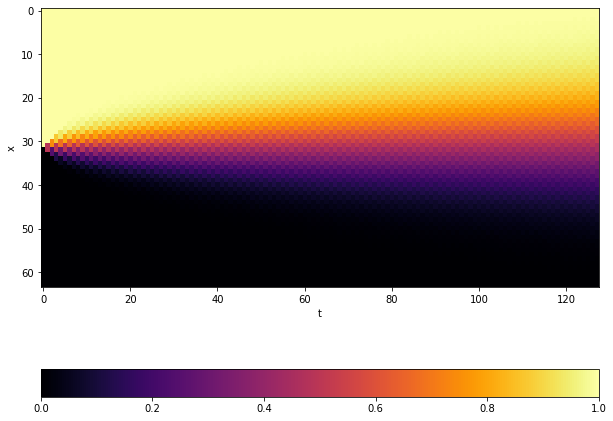

In [72]:
# Control parameter with stable solution
a = 0.01

# Solve PDE with Lax-Friedrichs method and plot result
sol = lax_friedrich(u_0, time_steps,a)
fig,ax = plt.subplots(figsize=(10,10))
im = ax.imshow(sol, cmap="inferno")
ax.set_xlabel("t")
ax.set_ylabel("x")
fig.colorbar(im, orientation="horizontal")

Text(0, 0.5, 'u')

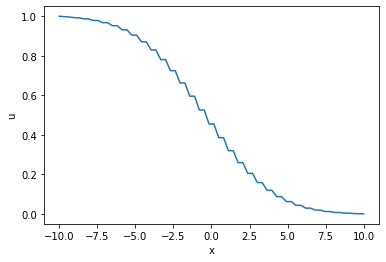

In [73]:
plt.plot(np.linspace(-10,10,position_steps), sol[:,127])
plt.xlabel("x")
plt.ylabel("u")

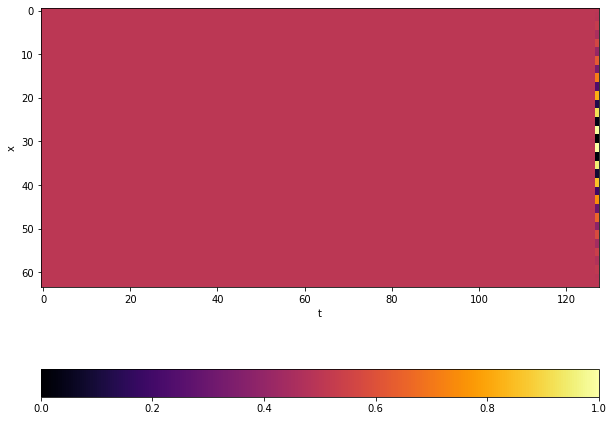

In [74]:
# Control parameter with unstable solution
a = 100

# Solve PDE with Lax-Friedrichs method and plot result
sol = lax_friedrich(u_0, time_steps,a)
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(sol, cmap="inferno")
ax.set_xlabel("t")
ax.set_ylabel("x")
fig.colorbar(im, orientation="horizontal")

Text(0, 0.5, 'u')

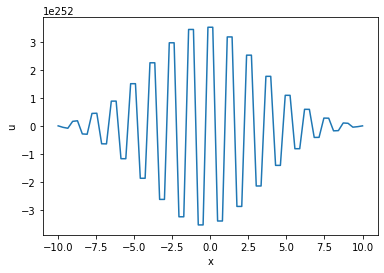

In [75]:
plt.plot(np.linspace(-10,10,position_steps), sol[:,127])
plt.xlabel("x")
plt.ylabel("u")